In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFA-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,famsize,studytime,failures,schoolsup,higher,internet,romantic,Dalc,health,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G3
0,1,1,18,1,2,0,1,1,0,0,1,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,6
1,1,1,17,1,2,0,0,1,1,0,1,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,6
2,1,1,15,0,2,0,1,1,1,0,2,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,6
3,1,1,15,1,3,0,0,1,1,1,1,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,7
4,1,1,16,1,2,0,0,1,0,0,1,5,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,7


In [3]:
df_por.shape

(649, 30)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,7.295410,10
1,6.822266,6
2,7.545410,9
3,6.106934,6
4,5.689453,6


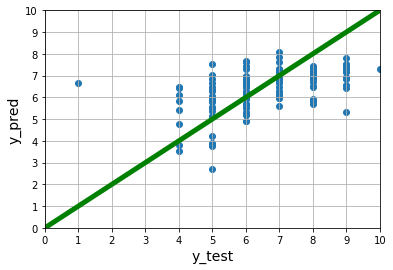

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

1.312167102390257

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.576923,10
1,6.467742,6
2,6.576923,9
3,6.576923,6
4,6.051282,6


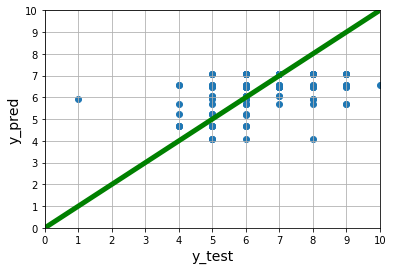

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [18]:
rmse(y_pred,y_test)

1.3673122232160484

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.510256,10
1,6.580414,6
2,6.900742,9
3,6.044834,6
4,6.112223,6


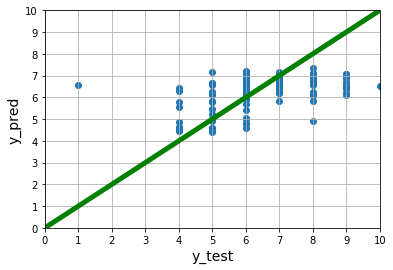

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [24]:
rmse(y_pred,y_test)

1.3160147502149737

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.554805,10
1,6.514516,6
2,6.696476,9
3,6.312500,6
4,6.088807,6


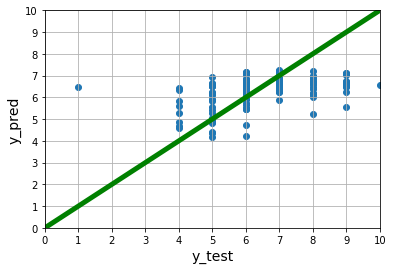

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [30]:
rmse(y_pred,y_test)

1.3293609292510098

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 29)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 700)

Train on 519 samples, validate on 130 samples
Epoch 1/700
519/519 [==============================] - 1s 2ms/sample - loss: 41.4081 - val_loss: 43.9611
Epoch 2/700
519/519 [==============================] - 0s 69us/sample - loss: 40.4594 - val_loss: 42.9560
Epoch 3/700
519/519 [==============================] - 0s 66us/sample - loss: 39.7682 - val_loss: 41.6808
Epoch 4/700
519/519 [==============================] - 0s 67us/sample - loss: 38.5972 - val_loss: 40.1285
Epoch 5/700
519/519 [==============================] - 0s 67us/sample - loss: 37.2657 - val_loss: 38.2545
Epoch 6/700
519/519 [==============================] - 0s 67us/sample - loss: 35.3630 - val_loss: 35.9303
Epoch 7/700
519/519 [==============================] - 0s 66us/sample - loss: 33.3024 - val_loss: 33.0945
Epoch 8/700
519/519 [==============================] - 0s 68us/sample - loss: 30.8136 - val_loss: 29.6447
Epoch 9/700
519/519 [==============================] - 0s 70us/sample - loss: 28.6252 - val_loss: 25.7066
E

519/519 [==============================] - 0s 60us/sample - loss: 5.6326 - val_loss: 3.0107
Epoch 79/700
519/519 [==============================] - 0s 58us/sample - loss: 6.0552 - val_loss: 2.9913
Epoch 80/700
519/519 [==============================] - 0s 56us/sample - loss: 5.6138 - val_loss: 2.7737
Epoch 81/700
519/519 [==============================] - 0s 58us/sample - loss: 5.8487 - val_loss: 2.4577
Epoch 82/700
519/519 [==============================] - 0s 56us/sample - loss: 6.3603 - val_loss: 2.4879
Epoch 83/700
519/519 [==============================] - 0s 54us/sample - loss: 5.4517 - val_loss: 2.7058
Epoch 84/700
519/519 [==============================] - 0s 52us/sample - loss: 5.1342 - val_loss: 2.9149
Epoch 85/700
519/519 [==============================] - 0s 58us/sample - loss: 5.8139 - val_loss: 2.8272
Epoch 86/700
519/519 [==============================] - 0s 60us/sample - loss: 4.9025 - val_loss: 2.5639
Epoch 87/700
519/519 [==============================] - 0s 58us/samp

519/519 [==============================] - 0s 54us/sample - loss: 3.1676 - val_loss: 2.1800
Epoch 156/700
519/519 [==============================] - 0s 56us/sample - loss: 3.9489 - val_loss: 2.1488
Epoch 157/700
519/519 [==============================] - 0s 62us/sample - loss: 3.9137 - val_loss: 2.1458
Epoch 158/700
519/519 [==============================] - 0s 71us/sample - loss: 3.8024 - val_loss: 2.1210
Epoch 159/700
519/519 [==============================] - 0s 64us/sample - loss: 3.8765 - val_loss: 2.1040
Epoch 160/700
519/519 [==============================] - 0s 64us/sample - loss: 3.9765 - val_loss: 2.1273
Epoch 161/700
519/519 [==============================] - 0s 62us/sample - loss: 3.6793 - val_loss: 2.0959
Epoch 162/700
519/519 [==============================] - 0s 60us/sample - loss: 3.6919 - val_loss: 2.0836
Epoch 163/700
519/519 [==============================] - 0s 58us/sample - loss: 3.8139 - val_loss: 2.0730
Epoch 164/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 54us/sample - loss: 3.2149 - val_loss: 2.0250
Epoch 233/700
519/519 [==============================] - 0s 54us/sample - loss: 3.0878 - val_loss: 1.9842
Epoch 234/700
519/519 [==============================] - 0s 58us/sample - loss: 3.1188 - val_loss: 1.8899
Epoch 235/700
519/519 [==============================] - 0s 56us/sample - loss: 3.4474 - val_loss: 1.8949
Epoch 236/700
519/519 [==============================] - 0s 58us/sample - loss: 3.0590 - val_loss: 1.8721
Epoch 237/700
519/519 [==============================] - 0s 60us/sample - loss: 3.1705 - val_loss: 1.8693
Epoch 238/700
519/519 [==============================] - 0s 56us/sample - loss: 2.9920 - val_loss: 1.9461
Epoch 239/700
519/519 [==============================] - 0s 56us/sample - loss: 3.0819 - val_loss: 1.9639
Epoch 240/700
519/519 [==============================] - 0s 56us/sample - loss: 3.1236 - val_loss: 1.9943
Epoch 241/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 2.8101 - val_loss: 1.8547
Epoch 310/700
519/519 [==============================] - 0s 56us/sample - loss: 2.8823 - val_loss: 1.8880
Epoch 311/700
519/519 [==============================] - 0s 58us/sample - loss: 2.7322 - val_loss: 1.8792
Epoch 312/700
519/519 [==============================] - 0s 56us/sample - loss: 2.5969 - val_loss: 1.8316
Epoch 313/700
519/519 [==============================] - 0s 56us/sample - loss: 2.5526 - val_loss: 1.7878
Epoch 314/700
519/519 [==============================] - 0s 56us/sample - loss: 2.7539 - val_loss: 1.8101
Epoch 315/700
519/519 [==============================] - 0s 56us/sample - loss: 2.8770 - val_loss: 1.8464
Epoch 316/700
519/519 [==============================] - 0s 54us/sample - loss: 2.7467 - val_loss: 1.8455
Epoch 317/700
519/519 [==============================] - 0s 58us/sample - loss: 2.9013 - val_loss: 1.8585
Epoch 318/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 2.5991 - val_loss: 1.8050
Epoch 387/700
519/519 [==============================] - 0s 56us/sample - loss: 2.5645 - val_loss: 1.7954
Epoch 388/700
519/519 [==============================] - 0s 58us/sample - loss: 2.7096 - val_loss: 1.8090
Epoch 389/700
519/519 [==============================] - 0s 56us/sample - loss: 2.4255 - val_loss: 1.7506
Epoch 390/700
519/519 [==============================] - 0s 62us/sample - loss: 2.4361 - val_loss: 1.7262
Epoch 391/700
519/519 [==============================] - 0s 56us/sample - loss: 2.6956 - val_loss: 1.7528
Epoch 392/700
519/519 [==============================] - 0s 58us/sample - loss: 2.5664 - val_loss: 1.8083
Epoch 393/700
519/519 [==============================] - 0s 62us/sample - loss: 2.5016 - val_loss: 1.8709
Epoch 394/700
519/519 [==============================] - 0s 58us/sample - loss: 2.4980 - val_loss: 1.8979
Epoch 395/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 2.3840 - val_loss: 1.7249
Epoch 464/700
519/519 [==============================] - 0s 54us/sample - loss: 2.1534 - val_loss: 1.7231
Epoch 465/700
519/519 [==============================] - 0s 54us/sample - loss: 2.4310 - val_loss: 1.7187
Epoch 466/700
519/519 [==============================] - 0s 60us/sample - loss: 2.4419 - val_loss: 1.7399
Epoch 467/700
519/519 [==============================] - 0s 60us/sample - loss: 2.1833 - val_loss: 1.7222
Epoch 468/700
519/519 [==============================] - 0s 56us/sample - loss: 2.2824 - val_loss: 1.7402
Epoch 469/700
519/519 [==============================] - 0s 58us/sample - loss: 2.3767 - val_loss: 1.7617
Epoch 470/700
519/519 [==============================] - 0s 56us/sample - loss: 2.3761 - val_loss: 1.7402
Epoch 471/700
519/519 [==============================] - 0s 58us/sample - loss: 2.2031 - val_loss: 1.7044
Epoch 472/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 2.0346 - val_loss: 1.7271
Epoch 541/700
519/519 [==============================] - 0s 56us/sample - loss: 2.1567 - val_loss: 1.7505
Epoch 542/700
519/519 [==============================] - 0s 54us/sample - loss: 2.0703 - val_loss: 1.7498
Epoch 543/700
519/519 [==============================] - 0s 55us/sample - loss: 2.0160 - val_loss: 1.7508
Epoch 544/700
519/519 [==============================] - 0s 58us/sample - loss: 2.0808 - val_loss: 1.7240
Epoch 545/700
519/519 [==============================] - 0s 58us/sample - loss: 1.9903 - val_loss: 1.7075
Epoch 546/700
519/519 [==============================] - 0s 54us/sample - loss: 2.2119 - val_loss: 1.6904
Epoch 547/700
519/519 [==============================] - 0s 60us/sample - loss: 2.1724 - val_loss: 1.6842
Epoch 548/700
519/519 [==============================] - 0s 58us/sample - loss: 2.1096 - val_loss: 1.6866
Epoch 549/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 54us/sample - loss: 2.1184 - val_loss: 1.7302
Epoch 618/700
519/519 [==============================] - 0s 58us/sample - loss: 1.8664 - val_loss: 1.7237
Epoch 619/700
519/519 [==============================] - 0s 58us/sample - loss: 2.0037 - val_loss: 1.7206
Epoch 620/700
519/519 [==============================] - 0s 58us/sample - loss: 2.0865 - val_loss: 1.6995
Epoch 621/700
519/519 [==============================] - 0s 56us/sample - loss: 1.9351 - val_loss: 1.7077
Epoch 622/700
519/519 [==============================] - 0s 56us/sample - loss: 1.9782 - val_loss: 1.7088
Epoch 623/700
519/519 [==============================] - 0s 54us/sample - loss: 1.9351 - val_loss: 1.7148
Epoch 624/700
519/519 [==============================] - 0s 56us/sample - loss: 1.8988 - val_loss: 1.7141
Epoch 625/700
519/519 [==============================] - 0s 56us/sample - loss: 2.0402 - val_loss: 1.7066
Epoch 626/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 60us/sample - loss: 1.8392 - val_loss: 1.7538
Epoch 695/700
519/519 [==============================] - 0s 60us/sample - loss: 1.9301 - val_loss: 1.7468
Epoch 696/700
519/519 [==============================] - 0s 62us/sample - loss: 1.7023 - val_loss: 1.7421
Epoch 697/700
519/519 [==============================] - 0s 66us/sample - loss: 1.7149 - val_loss: 1.7297
Epoch 698/700
519/519 [==============================] - 0s 64us/sample - loss: 1.9567 - val_loss: 1.7296
Epoch 699/700
519/519 [==============================] - 0s 71us/sample - loss: 1.8658 - val_loss: 1.7503
Epoch 700/700
519/519 [==============================] - 0s 69us/sample - loss: 1.9344 - val_loss: 1.7851


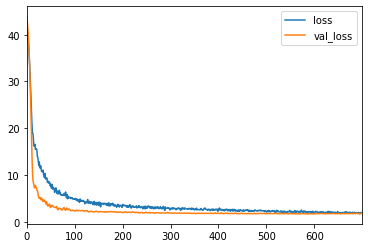

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,7.423707,10
1,6.143244,6
2,7.307810,9
3,5.466050,6
4,6.143244,6


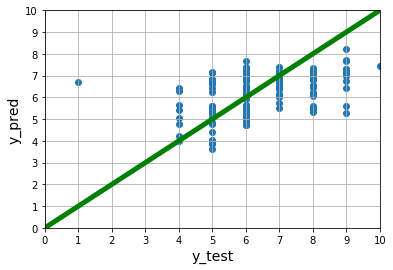

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [41]:
rmse(y_pred,y_test)

1.3360591474947798

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 700)

Train on 519 samples, validate on 259 samples
Epoch 1/700
519/519 [==============================] - 1s 1ms/sample - loss: 37.6191 - val_loss: 35.6079
Epoch 2/700
519/519 [==============================] - 0s 75us/sample - loss: 35.9094 - val_loss: 33.1381
Epoch 3/700
519/519 [==============================] - 0s 69us/sample - loss: 33.1725 - val_loss: 29.8759
Epoch 4/700
519/519 [==============================] - 0s 71us/sample - loss: 29.3450 - val_loss: 25.6548
Epoch 5/700
519/519 [==============================] - 0s 69us/sample - loss: 24.1435 - val_loss: 20.4087
Epoch 6/700
519/519 [==============================] - 0s 66us/sample - loss: 20.4071 - val_loss: 14.4830
Epoch 7/700
519/519 [==============================] - 0s 62us/sample - loss: 16.7935 - val_loss: 9.1627
Epoch 8/700
519/519 [==============================] - 0s 60us/sample - loss: 13.0225 - val_loss: 6.4820
Epoch 9/700
519/519 [==============================] - 0s 62us/sample - loss: 14.8850 - val_loss: 6.2188
Epoc

519/519 [==============================] - 0s 56us/sample - loss: 5.0242 - val_loss: 2.7708
Epoch 79/700
519/519 [==============================] - 0s 58us/sample - loss: 5.2731 - val_loss: 2.6521
Epoch 80/700
519/519 [==============================] - 0s 64us/sample - loss: 5.6394 - val_loss: 2.8034
Epoch 81/700
519/519 [==============================] - 0s 67us/sample - loss: 5.3299 - val_loss: 2.9635
Epoch 82/700
519/519 [==============================] - 0s 60us/sample - loss: 5.3107 - val_loss: 2.7506
Epoch 83/700
519/519 [==============================] - 0s 64us/sample - loss: 5.1287 - val_loss: 2.5256
Epoch 84/700
519/519 [==============================] - 0s 60us/sample - loss: 5.3773 - val_loss: 2.7080
Epoch 85/700
519/519 [==============================] - 0s 62us/sample - loss: 4.6648 - val_loss: 2.8140
Epoch 86/700
519/519 [==============================] - 0s 62us/sample - loss: 5.1241 - val_loss: 2.7064
Epoch 87/700
519/519 [==============================] - 0s 60us/samp

519/519 [==============================] - 0s 60us/sample - loss: 3.5482 - val_loss: 1.9259
Epoch 156/700
519/519 [==============================] - 0s 62us/sample - loss: 3.6126 - val_loss: 1.8810
Epoch 157/700
519/519 [==============================] - 0s 62us/sample - loss: 3.6293 - val_loss: 1.8550
Epoch 158/700
519/519 [==============================] - 0s 62us/sample - loss: 3.7205 - val_loss: 1.8597
Epoch 159/700
519/519 [==============================] - 0s 62us/sample - loss: 3.7465 - val_loss: 1.8592
Epoch 160/700
519/519 [==============================] - 0s 62us/sample - loss: 3.6483 - val_loss: 1.8881
Epoch 161/700
519/519 [==============================] - 0s 64us/sample - loss: 3.9227 - val_loss: 1.8904
Epoch 162/700
519/519 [==============================] - 0s 62us/sample - loss: 3.4375 - val_loss: 1.8912
Epoch 163/700
519/519 [==============================] - 0s 66us/sample - loss: 3.1334 - val_loss: 1.8525
Epoch 164/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 66us/sample - loss: 2.9599 - val_loss: 1.6734
Epoch 233/700
519/519 [==============================] - 0s 58us/sample - loss: 2.9382 - val_loss: 1.6605
Epoch 234/700
519/519 [==============================] - 0s 62us/sample - loss: 3.1613 - val_loss: 1.7332
Epoch 235/700
519/519 [==============================] - 0s 58us/sample - loss: 3.2816 - val_loss: 1.7957
Epoch 236/700
519/519 [==============================] - 0s 62us/sample - loss: 3.2258 - val_loss: 1.7665
Epoch 237/700
519/519 [==============================] - 0s 60us/sample - loss: 3.1019 - val_loss: 1.7171
Epoch 238/700
519/519 [==============================] - 0s 62us/sample - loss: 3.2196 - val_loss: 1.7394
Epoch 239/700
519/519 [==============================] - 0s 67us/sample - loss: 3.2554 - val_loss: 1.7435
Epoch 240/700
519/519 [==============================] - 0s 77us/sample - loss: 3.2451 - val_loss: 1.7626
Epoch 241/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 64us/sample - loss: 2.7990 - val_loss: 1.5858
Epoch 310/700
519/519 [==============================] - 0s 66us/sample - loss: 2.7586 - val_loss: 1.5667
Epoch 311/700
519/519 [==============================] - 0s 64us/sample - loss: 2.8867 - val_loss: 1.5726
Epoch 312/700
519/519 [==============================] - 0s 71us/sample - loss: 2.6013 - val_loss: 1.5564
Epoch 313/700
519/519 [==============================] - 0s 69us/sample - loss: 2.7068 - val_loss: 1.5465
Epoch 314/700
519/519 [==============================] - ETA: 0s - loss: 2.202 - 0s 69us/sample - loss: 2.5419 - val_loss: 1.5202
Epoch 315/700
519/519 [==============================] - 0s 69us/sample - loss: 2.7726 - val_loss: 1.5638
Epoch 316/700
519/519 [==============================] - 0s 69us/sample - loss: 2.6251 - val_loss: 1.6679
Epoch 317/700
519/519 [==============================] - 0s 64us/sample - loss: 2.6272 - val_loss: 1.6990
Epoch 318/700
519/519 [=============

519/519 [==============================] - 0s 60us/sample - loss: 2.7836 - val_loss: 1.5035
Epoch 387/700
519/519 [==============================] - 0s 62us/sample - loss: 2.5372 - val_loss: 1.5643
Epoch 388/700
519/519 [==============================] - 0s 66us/sample - loss: 2.5034 - val_loss: 1.5300
Epoch 389/700
519/519 [==============================] - 0s 58us/sample - loss: 2.5047 - val_loss: 1.4544
Epoch 390/700
519/519 [==============================] - 0s 60us/sample - loss: 2.6695 - val_loss: 1.4737
Epoch 391/700
519/519 [==============================] - 0s 60us/sample - loss: 2.5028 - val_loss: 1.4613
Epoch 392/700
519/519 [==============================] - 0s 60us/sample - loss: 2.4666 - val_loss: 1.4270
Epoch 393/700
519/519 [==============================] - 0s 64us/sample - loss: 2.7670 - val_loss: 1.4578
Epoch 394/700
519/519 [==============================] - 0s 60us/sample - loss: 2.6667 - val_loss: 1.5251
Epoch 395/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 62us/sample - loss: 2.5198 - val_loss: 1.4960
Epoch 464/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2555 - val_loss: 1.4399
Epoch 465/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2213 - val_loss: 1.4412
Epoch 466/700
519/519 [==============================] - 0s 60us/sample - loss: 2.3474 - val_loss: 1.4672
Epoch 467/700
519/519 [==============================] - 0s 66us/sample - loss: 2.5343 - val_loss: 1.4864
Epoch 468/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2257 - val_loss: 1.4257
Epoch 469/700
519/519 [==============================] - 0s 62us/sample - loss: 2.2732 - val_loss: 1.4412
Epoch 470/700
519/519 [==============================] - 0s 64us/sample - loss: 2.2342 - val_loss: 1.5120
Epoch 471/700
519/519 [==============================] - 0s 66us/sample - loss: 2.3871 - val_loss: 1.4949
Epoch 472/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 62us/sample - loss: 2.0714 - val_loss: 1.4176
Epoch 541/700
519/519 [==============================] - 0s 60us/sample - loss: 2.4347 - val_loss: 1.4335
Epoch 542/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2205 - val_loss: 1.4803
Epoch 543/700
519/519 [==============================] - 0s 64us/sample - loss: 2.0203 - val_loss: 1.4207
Epoch 544/700
519/519 [==============================] - 0s 62us/sample - loss: 2.3255 - val_loss: 1.4197
Epoch 545/700
519/519 [==============================] - 0s 60us/sample - loss: 2.0794 - val_loss: 1.5168
Epoch 546/700
519/519 [==============================] - 0s 60us/sample - loss: 2.3223 - val_loss: 1.4646
Epoch 547/700
519/519 [==============================] - 0s 66us/sample - loss: 2.3147 - val_loss: 1.4376
Epoch 548/700
519/519 [==============================] - 0s 67us/sample - loss: 2.3806 - val_loss: 1.4168
Epoch 549/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 62us/sample - loss: 2.1395 - val_loss: 1.4377
Epoch 618/700
519/519 [==============================] - 0s 60us/sample - loss: 2.1234 - val_loss: 1.4234
Epoch 619/700
519/519 [==============================] - 0s 60us/sample - loss: 2.1444 - val_loss: 1.3815
Epoch 620/700
519/519 [==============================] - 0s 64us/sample - loss: 1.8767 - val_loss: 1.4433
Epoch 621/700
519/519 [==============================] - 0s 62us/sample - loss: 1.9624 - val_loss: 1.4868
Epoch 622/700
519/519 [==============================] - 0s 64us/sample - loss: 2.1291 - val_loss: 1.4401
Epoch 623/700
519/519 [==============================] - 0s 62us/sample - loss: 2.0268 - val_loss: 1.4057
Epoch 624/700
519/519 [==============================] - 0s 60us/sample - loss: 1.9627 - val_loss: 1.3705
Epoch 625/700
519/519 [==============================] - 0s 64us/sample - loss: 2.0615 - val_loss: 1.3752
Epoch 626/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 62us/sample - loss: 2.0048 - val_loss: 1.3936
Epoch 695/700
519/519 [==============================] - 0s 60us/sample - loss: 1.8931 - val_loss: 1.3410
Epoch 696/700
519/519 [==============================] - 0s 60us/sample - loss: 1.8143 - val_loss: 1.3889
Epoch 697/700
519/519 [==============================] - 0s 62us/sample - loss: 1.9590 - val_loss: 1.4465
Epoch 698/700
519/519 [==============================] - 0s 60us/sample - loss: 1.7628 - val_loss: 1.3790
Epoch 699/700
519/519 [==============================] - 0s 62us/sample - loss: 1.8842 - val_loss: 1.3725
Epoch 700/700
519/519 [==============================] - 0s 64us/sample - loss: 1.7503 - val_loss: 1.4090


In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,4.086957,4.520000,4.787922,5.231084
1,6.941176,6.240000,6.339067,5.498534
2,4.086957,4.780000,4.785947,5.231084
3,7.300000,7.640000,7.051551,6.537150
4,7.300000,7.018333,6.877507,6.221319


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,6.162162,6.540000,6.556623,6.626527
1,5.793103,6.311667,6.589939,6.088902
2,6.162162,6.710000,6.537800,6.806483
3,6.162162,6.230000,6.473914,5.270929
4,5.793103,5.607500,5.644799,5.288165


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,7.557083,10
1,6.671047,6
2,7.844302,9
3,5.186982,6
4,5.124989,6


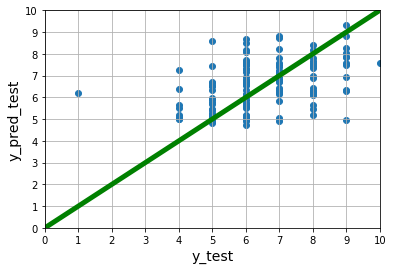

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [53]:
rmse(y_pred_test,y_test)

1.4019314582103377

In [54]:
mean_absolute_error(y_pred_test,y_test)

1.0746984156494124